# Analysis of the misalignment between non-COVID reported deaths and those estimated from the past

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path

In [2]:
ANALYSIS_PATH = Path('./data/covid_analysis')
ISTAT_PATH = Path('./data/istat')

In [3]:
ANALYSIS_PATH

WindowsPath('data/covid_analysis')

In [4]:
str(ANALYSIS_PATH)

'data\\covid_analysis'

## People per Italian Region

<img src="imgs/italy_regions-wanderingitaly.com.png" width="400px">

In [5]:
ita_ppl = pd.read_csv(str(ISTAT_PATH / 'population_per_region.csv'))

In [6]:
ita_ppl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   region  180 non-null    object
 1   year    180 non-null    int64 
 2   value   180 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.3+ KB


In [7]:
ita_ppl.head()

,region,year,value
0,Piemonte,2012,4357663
1,Piemonte,2013,4374052
2,Piemonte,2014,4436798
3,Piemonte,2015,4424467
4,Piemonte,2016,4404246


## Cumulative COVID-19 Deaths

In [8]:
# CUMulative COVID Daily Deaths
cum_covid_dd = pd.read_csv(str(ANALYSIS_PATH / 'cum_covid_daily_deaths.csv'), parse_dates=[0])

In [9]:
cum_covid_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5960 non-null   datetime64[ns]
 1   region  5960 non-null   object        
 2   deaths  5960 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 139.8+ KB


In [10]:
cum_covid_dd.tail(10)

,date,region,deaths
5950,2020-12-17,Molise,172
5951,2020-12-17,Piemonte,7382
5952,2020-12-17,Puglia,2100
5953,2020-12-17,Sardegna,634
5954,2020-12-17,Sicilia,2087
5955,2020-12-17,Toscana,3348
5956,2020-12-17,Trentino-Alto Adige,1494
5957,2020-12-17,Umbria,549
5958,2020-12-17,Valle d'Aosta,362
5959,2020-12-17,Veneto,5161


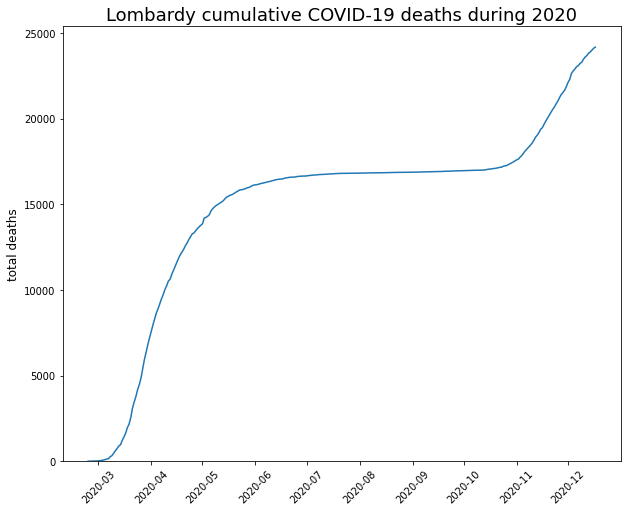

In [11]:
tmp = cum_covid_dd.query("region == 'Lombardia'")

plt.figure(figsize=(10, 8))
plt.title('Lombardy cumulative COVID-19 deaths during 2020', size=18)
plt.plot(tmp.date, tmp.deaths)
plt.ylabel('total deaths', size=12)
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.show()

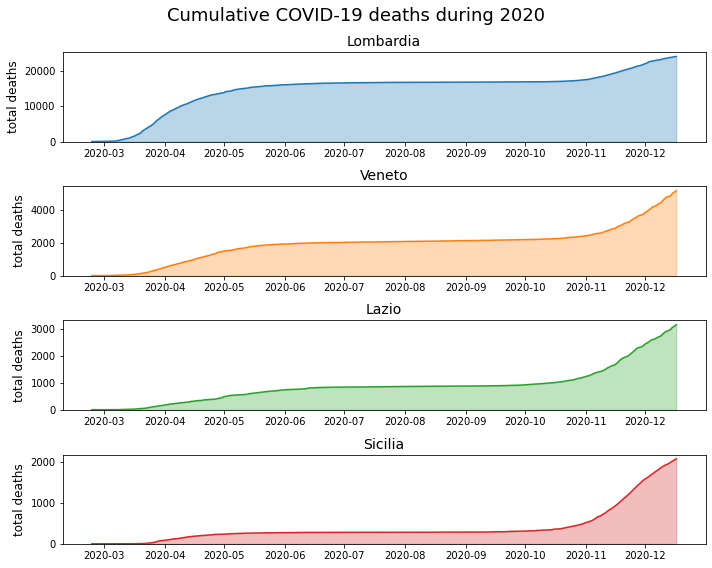

In [12]:
regions = ['Lombardia', 'Veneto', 'Lazio', 'Sicilia']

# `subplots`: "Create a figure and a set of subplots."
fig, axs = plt.subplots(nrows=len(regions), ncols=1, figsize=(10, 8))

# `subplot`: "Add a subplot to the current figure."
#fig = plt.figure(figsize=(12, 6))
#ax = plt.subplot()

fig.suptitle('Cumulative COVID-19 deaths during 2020', fontsize=18)

for i, region in enumerate(regions):
    mask = cum_covid_dd.region == region
    
    axs[i].set_title(f'{region}', size=14)
    # Warning: `axs[i].plot(x='date', y='deaths', data=cum_covid_dd)` this does not work
    axs[i].plot('date', 'deaths', data=cum_covid_dd[mask], color=f'C{i}')
    axs[i].set_ylabel('total deaths', size=12)
    axs[i].fill_between('date', 'deaths', data=cum_covid_dd[mask], color=f'C{i}', alpha=0.3)
    axs[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

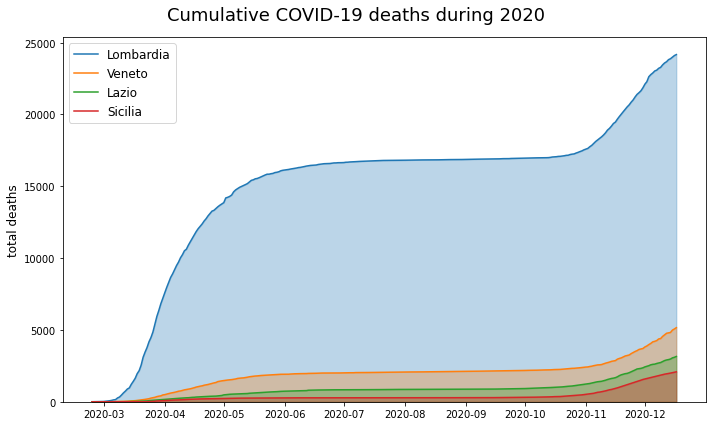

In [13]:
regions = ['Lombardia', 'Veneto', 'Lazio', 'Sicilia']

# `subplots`: "Create a figure and a set of subplots."
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

fig.suptitle('Cumulative COVID-19 deaths during 2020', fontsize=18)

for i, region in enumerate(regions):
    mask = cum_covid_dd.region == region
    
    ax.plot('date', 'deaths', data=cum_covid_dd[mask], color=f'C{i}', label=region)
    ax.set_ylabel('total deaths', size=12)
    ax.fill_between('date', 'deaths', data=cum_covid_dd[mask], color=f'C{i}', alpha=0.3)
    ax.set_ylim(bottom=0)

plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()

In [14]:
# Color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes
palette = sns.color_palette("tab20")
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

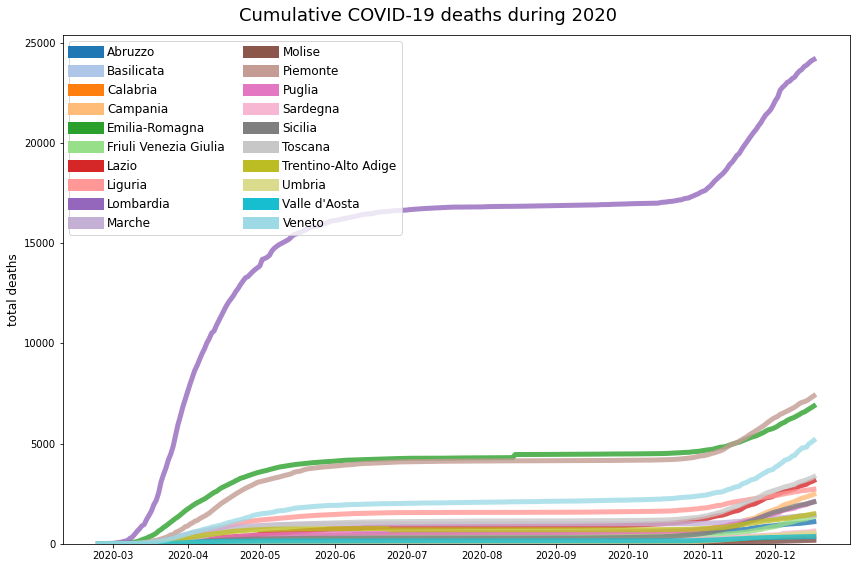

In [15]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Cumulative COVID-19 deaths during 2020', fontsize=18)

ax = sns.lineplot(data=cum_covid_dd, x='date', y='deaths', hue='region', palette=palette, linewidth=5, alpha=0.8)
ax.set_ylim(bottom=0)
ax.set_ylabel('total deaths', size=12)
ax.set_xlabel('')

# Custom legend
leg = ax.legend(prop={'size': 12}, ncol=2)
for line in leg.get_lines():
    line.set_linewidth(12)
    
plt.tight_layout()
plt.show()

### Deaths per million people

In [16]:
cum_covid_dd = cum_covid_dd.merge(
    ita_ppl.loc[ita_ppl.year == 2020, ['region', 'value']],
    on='region'
).rename(columns={'value': 'ppl'})

In [17]:
scale = 1e6
cum_covid_dd['deaths_per_million'] = (scale * cum_covid_dd.deaths / cum_covid_dd.ppl).round(2)

In [18]:
cum_covid_dd

,date,region,deaths,ppl,deaths_per_million
0,2020-02-24,Abruzzo,0,1293941,0.00
1,2020-02-25,Abruzzo,0,1293941,0.00
2,2020-02-26,Abruzzo,0,1293941,0.00
3,2020-02-27,Abruzzo,0,1293941,0.00
4,2020-02-28,Abruzzo,0,1293941,0.00
...,...,...,...,...,...
5955,2020-12-13,Veneto,4801,4879133,983.99
5956,2020-12-14,Veneto,4827,4879133,989.32
5957,2020-12-15,Veneto,4992,4879133,1023.13
5958,2020-12-16,Veneto,5069,4879133,1038.91


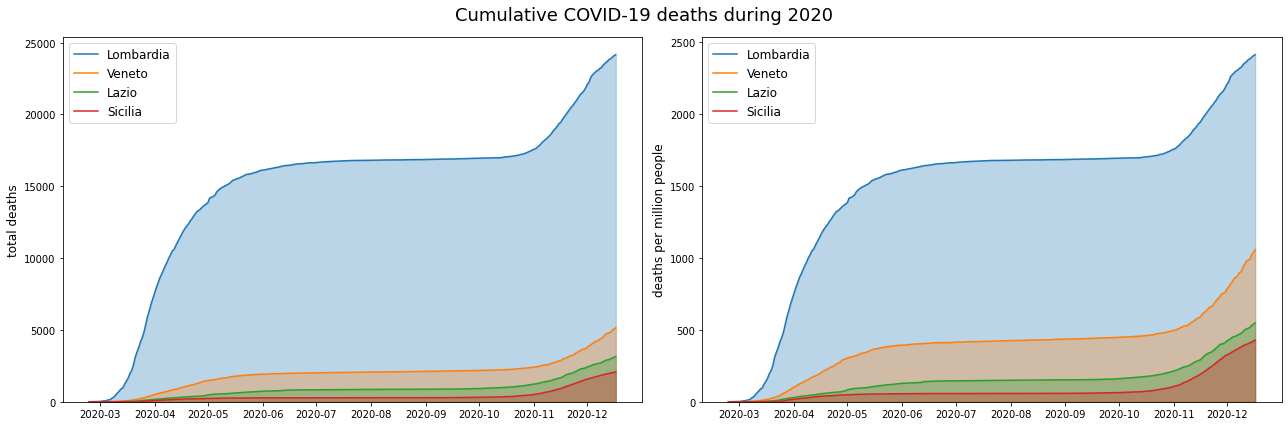

In [19]:
regions = ['Lombardia', 'Veneto', 'Lazio', 'Sicilia']


# `subplots`: "Create a figure and a set of subplots."
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

fig.suptitle('Cumulative COVID-19 deaths during 2020', fontsize=18)

for k, col in enumerate(range(2)):
    y_col = 'deaths_per_million' if k > 0 else 'deaths'
    y_label = 'deaths per million people' if k > 0 else 'total deaths'
    
    for i, region in enumerate(regions):
        mask = cum_covid_dd.region == region

        axs[k].plot('date', y_col, data=cum_covid_dd[mask], color=f'C{i}', label=region)
        axs[k].set_ylabel(y_label, size=12)
        axs[k].fill_between('date', y_col, data=cum_covid_dd[mask], color=f'C{i}', alpha=0.3)
        axs[k].set_ylim(bottom=0)
        axs[k].legend(loc='upper left', prop={'size': 12})
        
plt.tight_layout()
plt.show()

**Lombardy VS Veneto**

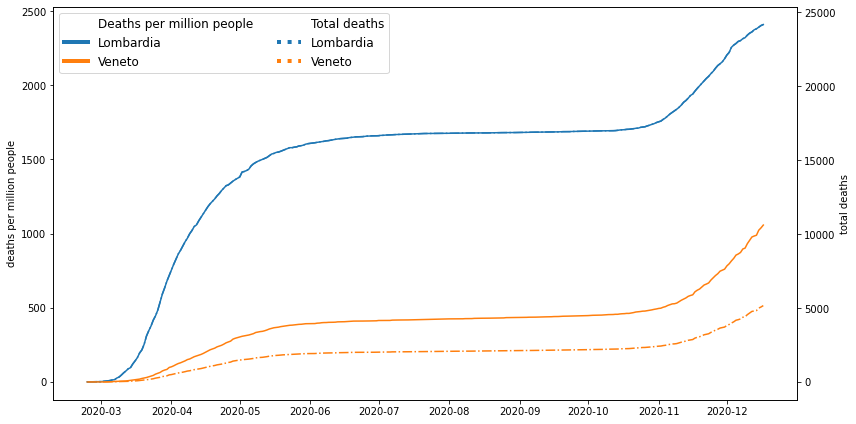

In [20]:
# Another example: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
from matplotlib.lines import Line2D


regions = ['Lombardia', 'Veneto']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('deaths per million people')
ax2.set_ylabel('total deaths')


for i, region in enumerate(regions):
    mask = cum_covid_dd.region == region
    
    c = f'C{i}'
    ax1.plot('date', 'deaths_per_million', data=cum_covid_dd[mask], color=c, label=region, ls='-')

    ax2.plot('date', 'deaths', data=cum_covid_dd[mask], color=c, label=region, ls='-.')
    

labels = []
custom_lines = []
for i in range(2):
    # Add legend labels
    labels.append(
        'Total deaths' if i > 0 else 'Deaths per million people'
    )
    labels.extend(regions)
    
    # Add legend lines
    line_style = ':' if i > 0 else '-'
    custom_lines.append(
        Line2D([0], [0], lw=0)
    )
    custom_lines.extend([
        Line2D([0], [0], color=f'C{i}', lw=4, ls=line_style)
        for i, _ in enumerate(regions)
    ])
custom_lines *= 2

plt.legend(custom_lines, labels, loc='upper left', prop={'size': 12}, ncol=2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**Emilia Romagna VS Tuscany**

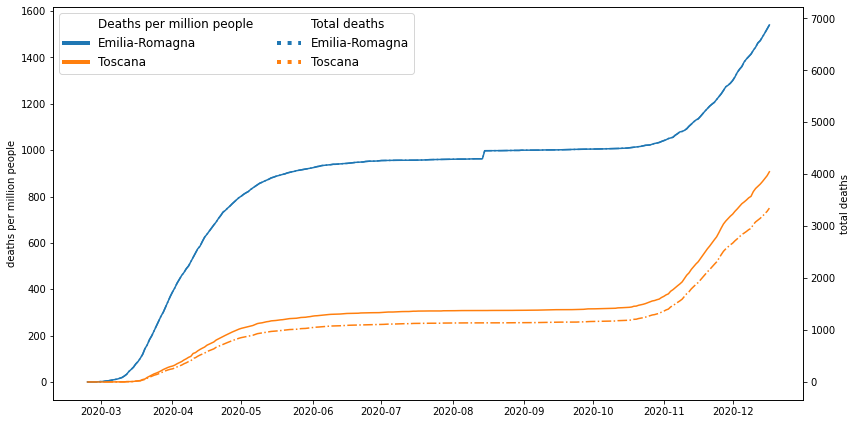

In [21]:
# Another example: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
from matplotlib.lines import Line2D


regions = ['Emilia-Romagna', 'Toscana']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('deaths per million people')
ax2.set_ylabel('total deaths')


for i, region in enumerate(regions):
    mask = cum_covid_dd.region == region
    
    c = f'C{i}'
    ax1.plot('date', 'deaths_per_million', data=cum_covid_dd[mask], color=c, label=region, ls='-')

    ax2.plot('date', 'deaths', data=cum_covid_dd[mask], color=c, label=region, ls='-.')
    

labels = []
custom_lines = []
for i in range(2):
    # Add legend labels
    labels.append(
        'Total deaths' if i > 0 else 'Deaths per million people'
    )
    labels.extend(regions)
    
    # Add legend lines
    line_style = ':' if i > 0 else '-'
    custom_lines.append(
        Line2D([0], [0], lw=0)
    )
    custom_lines.extend([
        Line2D([0], [0], color=f'C{i}', lw=4, ls=line_style)
        for i, _ in enumerate(regions)
    ])
custom_lines *= 2

plt.legend(custom_lines, labels, loc='upper left', prop={'size': 12}, ncol=2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Incremental Daily COVID-19 Deaths

In [22]:
# INCremental COVID Daily Deaths
inc_covid_dd = pd.read_csv(str(ANALYSIS_PATH / 'inc_covid_daily_deaths.csv'), parse_dates=[0])

In [23]:
inc_covid_dd.rename(columns={'covid_deaths_2020': 'deaths'}, inplace=True)

In [24]:
inc_covid_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5960 non-null   datetime64[ns]
 1   region  5960 non-null   object        
 2   deaths  5940 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 139.8+ KB


In [25]:
inc_covid_dd.tail(10)

,date,region,deaths
5950,2020-12-08,Veneto,113.0
5951,2020-12-09,Veneto,29.0
5952,2020-12-10,Veneto,148.0
5953,2020-12-11,Veneto,108.0
5954,2020-12-12,Veneto,110.0
5955,2020-12-13,Veneto,32.0
5956,2020-12-14,Veneto,26.0
5957,2020-12-15,Veneto,165.0
5958,2020-12-16,Veneto,77.0
5959,2020-12-17,Veneto,92.0


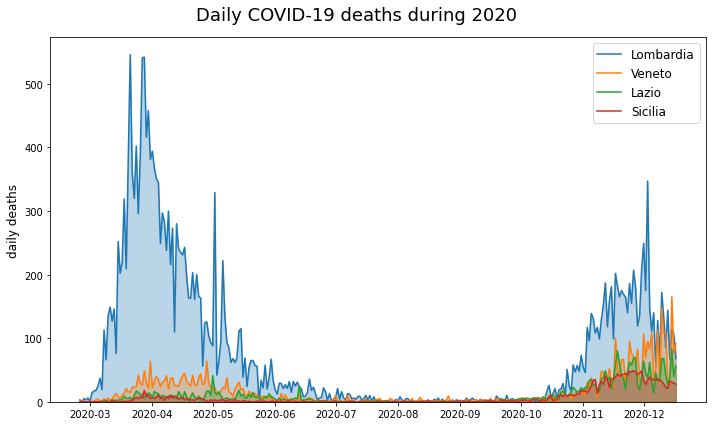

In [26]:
regions = ['Lombardia', 'Veneto', 'Lazio', 'Sicilia']

# `subplots`: "Create a figure and a set of subplots."
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

fig.suptitle('Daily COVID-19 deaths during 2020', fontsize=18)

for i, region in enumerate(regions):
    mask = inc_covid_dd.region == region
    
    ax.plot('date', 'deaths', data=inc_covid_dd[mask], color=f'C{i}', label=region)
    ax.set_ylabel('daily deaths', size=12)
    ax.fill_between('date', 'deaths', data=inc_covid_dd[mask], color=f'C{i}', alpha=0.3)
    ax.set_ylim(bottom=0)

plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()

### Deaths per million people

In [27]:
inc_covid_dd = inc_covid_dd.merge(
    ita_ppl.loc[ita_ppl.year == 2020, ['region', 'value']],
    on='region'
).rename(columns={'value': 'ppl'})

In [28]:
scale = 1e6
inc_covid_dd['deaths_per_million'] = (scale * inc_covid_dd.deaths / inc_covid_dd.ppl).round(2)

In [29]:
inc_covid_dd

,date,region,deaths,ppl,deaths_per_million
0,2020-02-24,Abruzzo,NaN,1293941,NaN
1,2020-02-25,Abruzzo,0.0,1293941,0.00
2,2020-02-26,Abruzzo,0.0,1293941,0.00
3,2020-02-27,Abruzzo,0.0,1293941,0.00
4,2020-02-28,Abruzzo,0.0,1293941,0.00
...,...,...,...,...,...
5955,2020-12-13,Veneto,32.0,4879133,6.56
5956,2020-12-14,Veneto,26.0,4879133,5.33
5957,2020-12-15,Veneto,165.0,4879133,33.82
5958,2020-12-16,Veneto,77.0,4879133,15.78


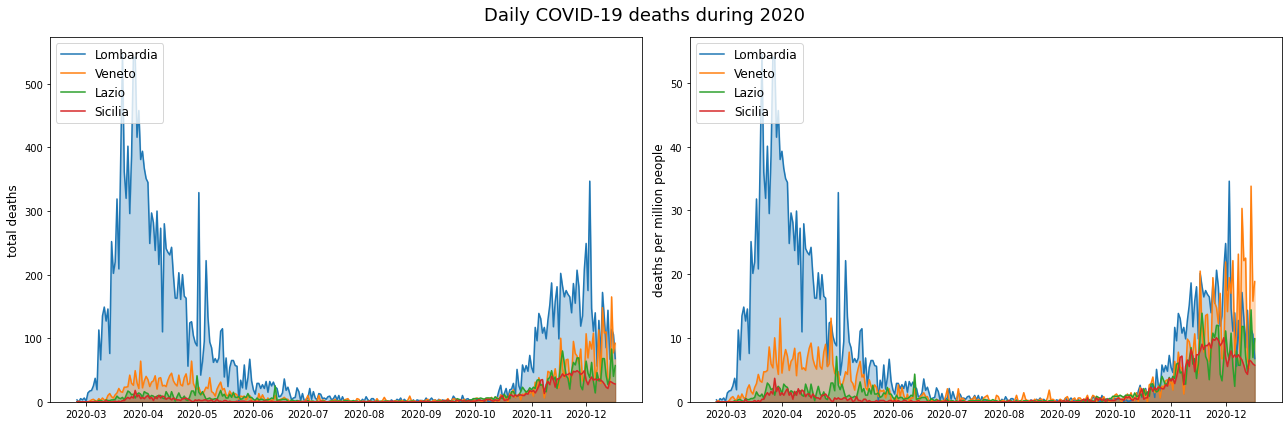

In [30]:
regions = ['Lombardia', 'Veneto', 'Lazio', 'Sicilia']


# `subplots`: "Create a figure and a set of subplots."
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

fig.suptitle('Daily COVID-19 deaths during 2020', fontsize=18)

for k, col in enumerate(range(2)):
    y_col = 'deaths_per_million' if k > 0 else 'deaths'
    y_label = 'deaths per million people' if k > 0 else 'total deaths'
    
    for i, region in enumerate(regions):
        mask = inc_covid_dd.region == region

        axs[k].plot('date', y_col, data=inc_covid_dd[mask], color=f'C{i}', label=region)
        axs[k].set_ylabel(y_label, size=12)
        axs[k].fill_between('date', y_col, data=inc_covid_dd[mask], color=f'C{i}', alpha=0.3)
        axs[k].set_ylim(bottom=0)
        axs[k].legend(loc='upper left', prop={'size': 12})
        
plt.tight_layout()
plt.show()

**Lombardy VS Veneto**

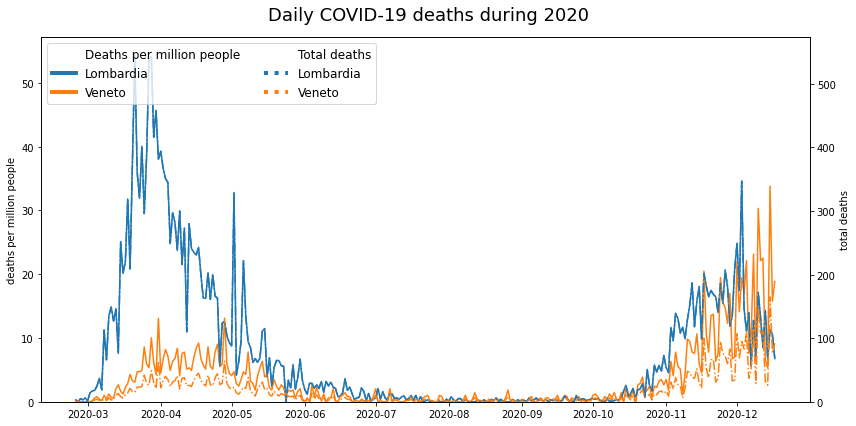

In [31]:
# Another example: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
from matplotlib.lines import Line2D


regions = ['Lombardia', 'Veneto']

fig, ax1 = plt.subplots(figsize=(12, 6))
fig.suptitle('Daily COVID-19 deaths during 2020', fontsize=18)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('deaths per million people')
ax2.set_ylabel('total deaths')


for i, region in enumerate(regions):
    mask = inc_covid_dd.region == region
    
    c = f'C{i}'
    ax1.plot('date', 'deaths_per_million', data=inc_covid_dd[mask], color=c, label=region, ls='-')
    ax1.set_ylim(bottom=0)

    ax2.plot('date', 'deaths', data=inc_covid_dd[mask], color=c, label=region, ls='-.')
    ax2.set_ylim(bottom=0)
    

labels = []
custom_lines = []
for i in range(2):
    # Add legend labels
    labels.append(
        'Total deaths' if i > 0 else 'Deaths per million people'
    )
    labels.extend(regions)
    
    # Add legend lines
    line_style = ':' if i > 0 else '-'
    custom_lines.append(
        Line2D([0], [0], lw=0)
    )
    custom_lines.extend([
        Line2D([0], [0], color=f'C{i}', lw=4, ls=line_style)
        for i, _ in enumerate(regions)
    ])
custom_lines *= 2

plt.legend(custom_lines, labels, loc='upper left', prop={'size': 12}, ncol=2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Incremental Weekly COVID-19 Deaths

In [32]:
# Group by region and week (returns the Sunday's date referring to that week)
inc_covid_wd = inc_covid_dd.groupby([
    'region',
    pd.Grouper(freq='W', key='date')
])['deaths_per_million'].sum().reset_index()

inc_covid_wd.rename(columns={'date': 'week'}, inplace=True)

In [33]:
inc_covid_wd

,region,week,deaths_per_million
0,Abruzzo,2020-03-01,0.00
1,Abruzzo,2020-03-08,0.00
2,Abruzzo,2020-03-15,2.31
3,Abruzzo,2020-03-22,23.18
4,Abruzzo,2020-03-29,42.49
...,...,...,...
855,Veneto,2020-11-22,77.07
856,Veneto,2020-11-29,93.46
857,Veneto,2020-12-06,109.24
858,Veneto,2020-12-13,121.12


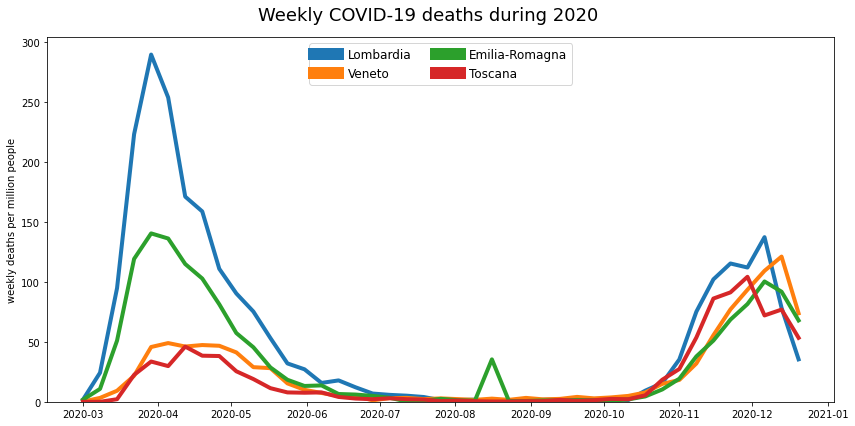

In [34]:
regions = ['Lombardia', 'Veneto', 'Emilia-Romagna', 'Toscana']

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Weekly COVID-19 deaths during 2020', fontsize=18)

for i, region in enumerate(regions):
    mask = inc_covid_wd.region == region
    
    ax.plot('week', 'deaths_per_million', data=inc_covid_wd[mask], color=f'C{i}', label=region, ls='-', lw=4)


ax.set_ylabel('weekly deaths per million people')
ax.set_ylim(bottom=0)

# Custom legend
leg = ax.legend(loc='upper center', prop={'size': 12}, ncol=2)
for line in leg.get_lines():
    line.set_linewidth(12)
    
fig.tight_layout()
plt.show()

### Weekly deaths variation

In [35]:
inc_covid_wd.sort_values(['region', 'week'], inplace=True)
inc_covid_wd['delta_dpm'] = inc_covid_wd.groupby('region')['deaths_per_million'].diff().fillna(0)

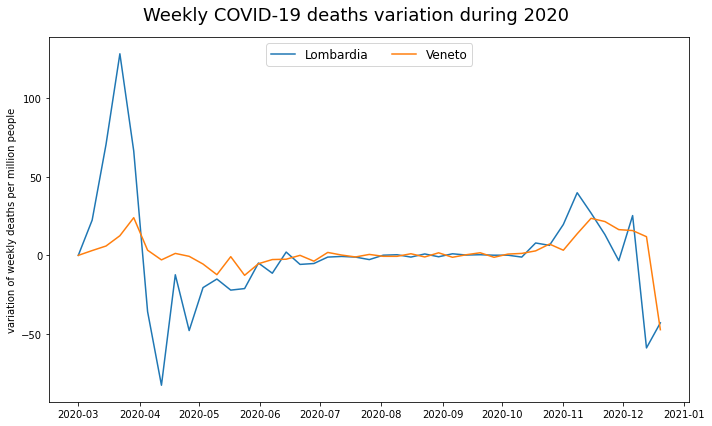

In [36]:
regions = ['Lombardia', 'Veneto']


fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Weekly COVID-19 deaths variation during 2020', fontsize=18)

for i, region in enumerate(regions):
    mask = inc_covid_wd.region == region
    
    ax.plot('week', 'delta_dpm', data=inc_covid_wd[mask], color=f'C{i}', label=region, ls='-')


ax.set_ylabel('variation of weekly deaths per million people')

plt.legend(loc='upper center', prop={'size': 12}, ncol=2)
fig.tight_layout()
plt.show()

## Historical Monthly Deaths Comparison

In [37]:
# Historical monthly deaths comparison
hist_comp_md = pd.read_csv(str(ANALYSIS_PATH / 'hist_covid_monthly_deaths_comparison.csv'))

In [38]:
hist_comp_md

,month,region,covid_deaths_2020,avg_deaths,noncovid_deaths_2020,tot_deaths_2015,tot_deaths_2016,tot_deaths_2017,tot_deaths_2018,tot_deaths_2019,tot_deaths_2020
0,2,Abruzzo,0.0,1359.4,1362.0,1468,1242,1337,1348,1402,1362
1,2,Basilicata,0.0,581.6,602.0,600,553,522,573,660,602
2,2,Calabria,0.0,1858.6,1732.0,2001,1752,1779,1770,1991,1732
3,2,Campania,0.0,4970.8,4884.0,5363,4512,4793,5043,5143,4884
4,2,Emilia-Romagna,4.0,4437.0,4380.0,4767,4170,4334,4344,4570,4384
...,...,...,...,...,...,...,...,...,...,...,...
147,9,Toscana,23.0,3201.2,3438.0,3251,3099,3216,3181,3259,3461
148,9,Trentino-Alto Adige,1.0,710.4,722.0,684,709,712,700,747,723
149,9,Umbria,5.0,749.8,774.0,767,772,722,741,747,779
150,9,Valle d'Aosta,0.0,106.4,103.0,111,101,113,101,106,103


In [39]:
base_cols = ['month', 'region']


def extract_from_df(data: pd.DataFrame, col: str, base_cols: list[str], death_type: str):
    tmp = pd.DataFrame()
    tmp = pd.concat([tmp, data[base_cols + [col]]], axis=0)
    tmp['year'] = col[-4:]
    tmp['death_type'] = death_type
    tmp.rename(columns={col: 'deaths'}, inplace=True)
    return tmp


# Covid Deaths
new_hist_comp_md = extract_from_df(data=hist_comp_md, col='covid_deaths_2020', base_cols=base_cols, death_type='covid')

# Non-Covid Deaths
new_hist_comp_md = pd.concat(
    [new_hist_comp_md, extract_from_df(data=hist_comp_md, col='noncovid_deaths_2020', base_cols=base_cols, death_type='non-covid')],
    ignore_index=True
)

# Total deaths
for year in range(2015, 2021):
    new_hist_comp_md = pd.concat(
        [new_hist_comp_md, extract_from_df(data=hist_comp_md, col=f'tot_deaths_{year}', base_cols=base_cols, death_type='total')],
        ignore_index=True
    )

In [40]:
new_hist_comp_md.year = new_hist_comp_md.year.astype('int')

In [41]:
new_hist_comp_md

,month,region,deaths,year,death_type
0,2,Abruzzo,0.0,2020,covid
1,2,Basilicata,0.0,2020,covid
2,2,Calabria,0.0,2020,covid
3,2,Campania,0.0,2020,covid
4,2,Emilia-Romagna,4.0,2020,covid
...,...,...,...,...,...
1211,9,Toscana,3461.0,2020,total
1212,9,Trentino-Alto Adige,723.0,2020,total
1213,9,Umbria,779.0,2020,total
1214,9,Valle d'Aosta,103.0,2020,total


**Deaths per million**

In [42]:
new_hist_comp_md = new_hist_comp_md.merge(
    ita_ppl[['region', 'year', 'value']],
    on=['region', 'year']
).rename(columns={'value': 'ppl'})

In [43]:
scale = 1e6
new_hist_comp_md['deaths_per_million'] = (scale * new_hist_comp_md.deaths / new_hist_comp_md.ppl).round(2)

In [44]:
new_hist_comp_md

,month,region,deaths,year,death_type,ppl,deaths_per_million
0,2,Abruzzo,0.0,2020,covid,1293941,0.00
1,3,Abruzzo,115.0,2020,covid,1293941,88.88
2,4,Abruzzo,205.0,2020,covid,1293941,158.43
3,5,Abruzzo,85.0,2020,covid,1293941,65.69
4,6,Abruzzo,59.0,2020,covid,1293941,45.60
...,...,...,...,...,...,...,...
1211,5,Veneto,3930.0,2019,total,4884590,804.57
1212,6,Veneto,3920.0,2019,total,4884590,802.52
1213,7,Veneto,3827.0,2019,total,4884590,783.48
1214,8,Veneto,3770.0,2019,total,4884590,771.82


**Lombardy**

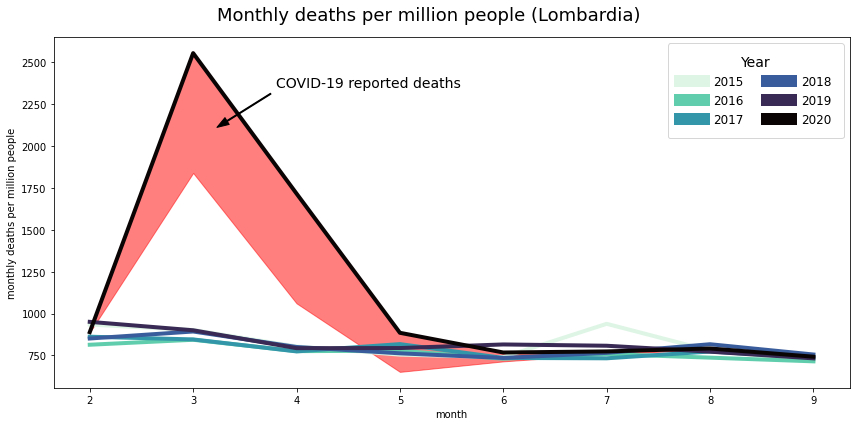

In [45]:
region = 'Lombardia'

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle(f'Monthly deaths per million people ({region})', fontsize=18)

# Total deaths
mask0 = new_hist_comp_md.death_type == 'total'
mask1 = new_hist_comp_md.region == region
sns.lineplot(
    x='month',
    y='deaths_per_million',
    hue='year',
    data=new_hist_comp_md[mask0 & mask1],
    palette='mako_r',
    lw=4,
    ax=ax
)


# Delta deaths: Covid-19
mask = (new_hist_comp_md.region == region) & (new_hist_comp_md.year == 2020)
mask_1 = new_hist_comp_md.death_type == 'non-covid'
mask_2 = new_hist_comp_md.death_type == 'total'
ax.fill_between(
    x=new_hist_comp_md.loc[mask & mask_1, 'month'],
    y1=new_hist_comp_md.loc[mask & mask_1, 'deaths_per_million'],
    y2=new_hist_comp_md.loc[mask & mask_2, 'deaths_per_million'],
    color='red',
    alpha=0.5
)
ax.annotate('COVID-19 reported deaths', xy=(3.2, 2100), xytext=(3.8, 2350), fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))


ax.set_ylabel('monthly deaths per million people')

leg = ax.legend(title='Year', title_fontsize='14', loc='upper right', ncol=2, borderpad=1, prop={'size': 12})
for line in leg.get_lines():
    line.set_linewidth(12)

fig.tight_layout()
plt.show()

**Veneto**

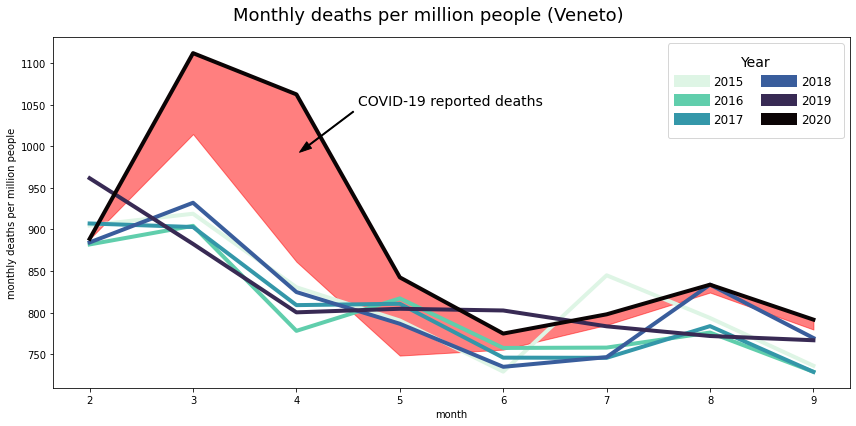

In [46]:
region = 'Veneto'

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle(f'Monthly deaths per million people ({region})', fontsize=18)

# Total deaths
mask0 = new_hist_comp_md.death_type == 'total'
mask1 = new_hist_comp_md.region == region
sns.lineplot(
    x='month',
    y='deaths_per_million',
    hue='year',
    data=new_hist_comp_md[mask0 & mask1],
    palette='mako_r',
    lw=4,
    ax=ax
)


# Delta deaths: Covid-19
mask = (new_hist_comp_md.region == region) & (new_hist_comp_md.year == 2020)
mask_1 = new_hist_comp_md.death_type == 'non-covid'
mask_2 = new_hist_comp_md.death_type == 'total'
ax.fill_between(
    x=new_hist_comp_md.loc[mask & mask_1, 'month'],
    y1=new_hist_comp_md.loc[mask & mask_1, 'deaths_per_million'],
    y2=new_hist_comp_md.loc[mask & mask_2, 'deaths_per_million'],
    color='red',
    alpha=0.5
)
ax.annotate('COVID-19 reported deaths', xy=(4, 990), xytext=(4.6, 1050), fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))


ax.set_ylabel('monthly deaths per million people')

leg = ax.legend(title='Year', title_fontsize='14', loc='upper right', ncol=2, borderpad=1, prop={'size': 12})
for line in leg.get_lines():
    line.set_linewidth(12)

fig.tight_layout()
plt.show()

## Misalignment between non-COVID reported deaths and historical data

**Lombardy**

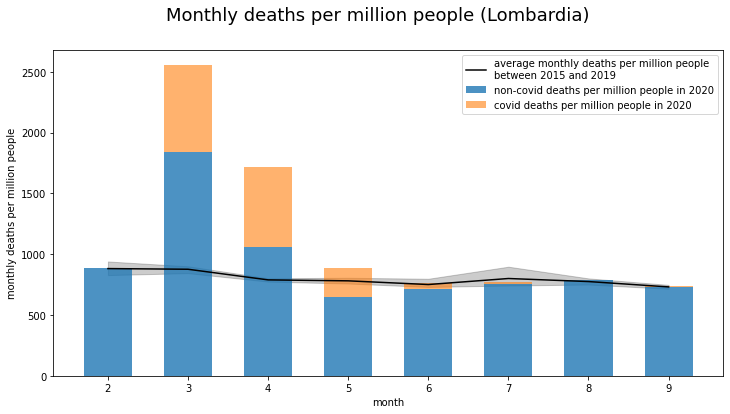

In [47]:
region = 'Lombardia'

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle(f'Monthly deaths per million people ({region})', fontsize=18)

# 2020 COVID-19 deaths as bar-plot
death_types = ['non-covid', 'covid']
mask = (new_hist_comp_md.region == region) & (new_hist_comp_md.year == 2020)
for dt in death_types:
    mask1 = new_hist_comp_md.death_type == dt
    mask2 = new_hist_comp_md.death_type == 'non-covid'

    ax.bar(
        new_hist_comp_md.loc[mask & mask1, 'month'],
        new_hist_comp_md.loc[mask & mask1, 'deaths_per_million'],
        bottom=0 if (mask1 == mask2).all() else new_hist_comp_md.loc[mask & mask2, 'deaths_per_million'],
        width=0.60,
        label=f'{dt} deaths per million people in 2020',
        alpha=0.8 if dt == 'non-covid' else 0.6,
    )
    
# 2015-2019 deaths as line-plot
mask = (new_hist_comp_md.region == region) & (new_hist_comp_md.year < 2020)
sns.lineplot(
    x='month',
    y='deaths_per_million',
    data=new_hist_comp_md.loc[mask],
    color='black',
    label='average monthly deaths per million people\nbetween 2015 and 2019',
    estimator='mean',
    ci=99,
    ax=ax
)

ax.set_xlabel('month')
ax.set_ylabel('monthly deaths per million people')

plt.legend()
plt.show()

**Veneto**

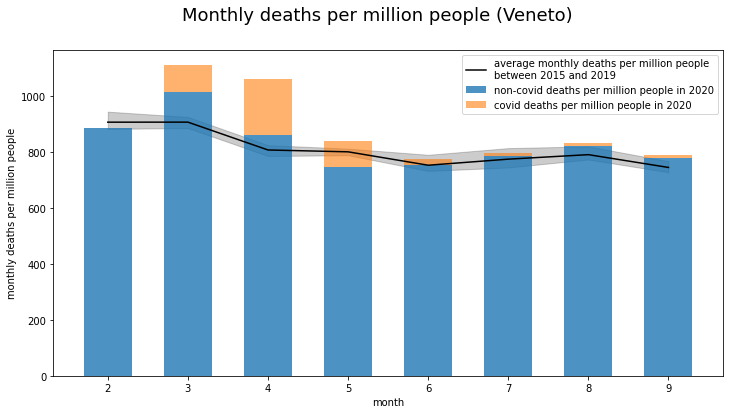

In [48]:
region = 'Veneto'

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle(f'Monthly deaths per million people ({region})', fontsize=18)

# 2020 COVID-19 deaths as bar-plot
death_types = ['non-covid', 'covid']
mask = (new_hist_comp_md.region == region) & (new_hist_comp_md.year == 2020)
for dt in death_types:
    mask1 = new_hist_comp_md.death_type == dt
    mask2 = new_hist_comp_md.death_type == 'non-covid'

    ax.bar(
        new_hist_comp_md.loc[mask & mask1, 'month'],
        new_hist_comp_md.loc[mask & mask1, 'deaths_per_million'],
        bottom=0 if (mask1 == mask2).all() else new_hist_comp_md.loc[mask & mask2, 'deaths_per_million'],
        width=0.60,
        label=f'{dt} deaths per million people in 2020',
        alpha=0.8 if dt == 'non-covid' else 0.6,
    )
    
# 2015-2019 deaths as line-plot
mask = (new_hist_comp_md.region == region) & (new_hist_comp_md.year < 2020)
sns.lineplot(
    x='month',
    y='deaths_per_million',
    data=new_hist_comp_md.loc[mask],
    color='black',
    label='average monthly deaths per million people\nbetween 2015 and 2019',
    estimator='mean',
    ci=99,
    ax=ax
)

ax.set_xlabel('month')
ax.set_ylabel('monthly deaths per million people')

plt.legend()
plt.show()